In [1]:
from windisch import *

In [2]:
update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={
        #"year": [2020, 2030],
        "size": [1000, ],
        "application": [
            "onshore",
            "offshore"
        ],
    }
)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.0, 12.7),
    #wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

In [3]:
inv = Inventory(wt)
res = inv.calculate_impacts()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_64274/2552470957.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


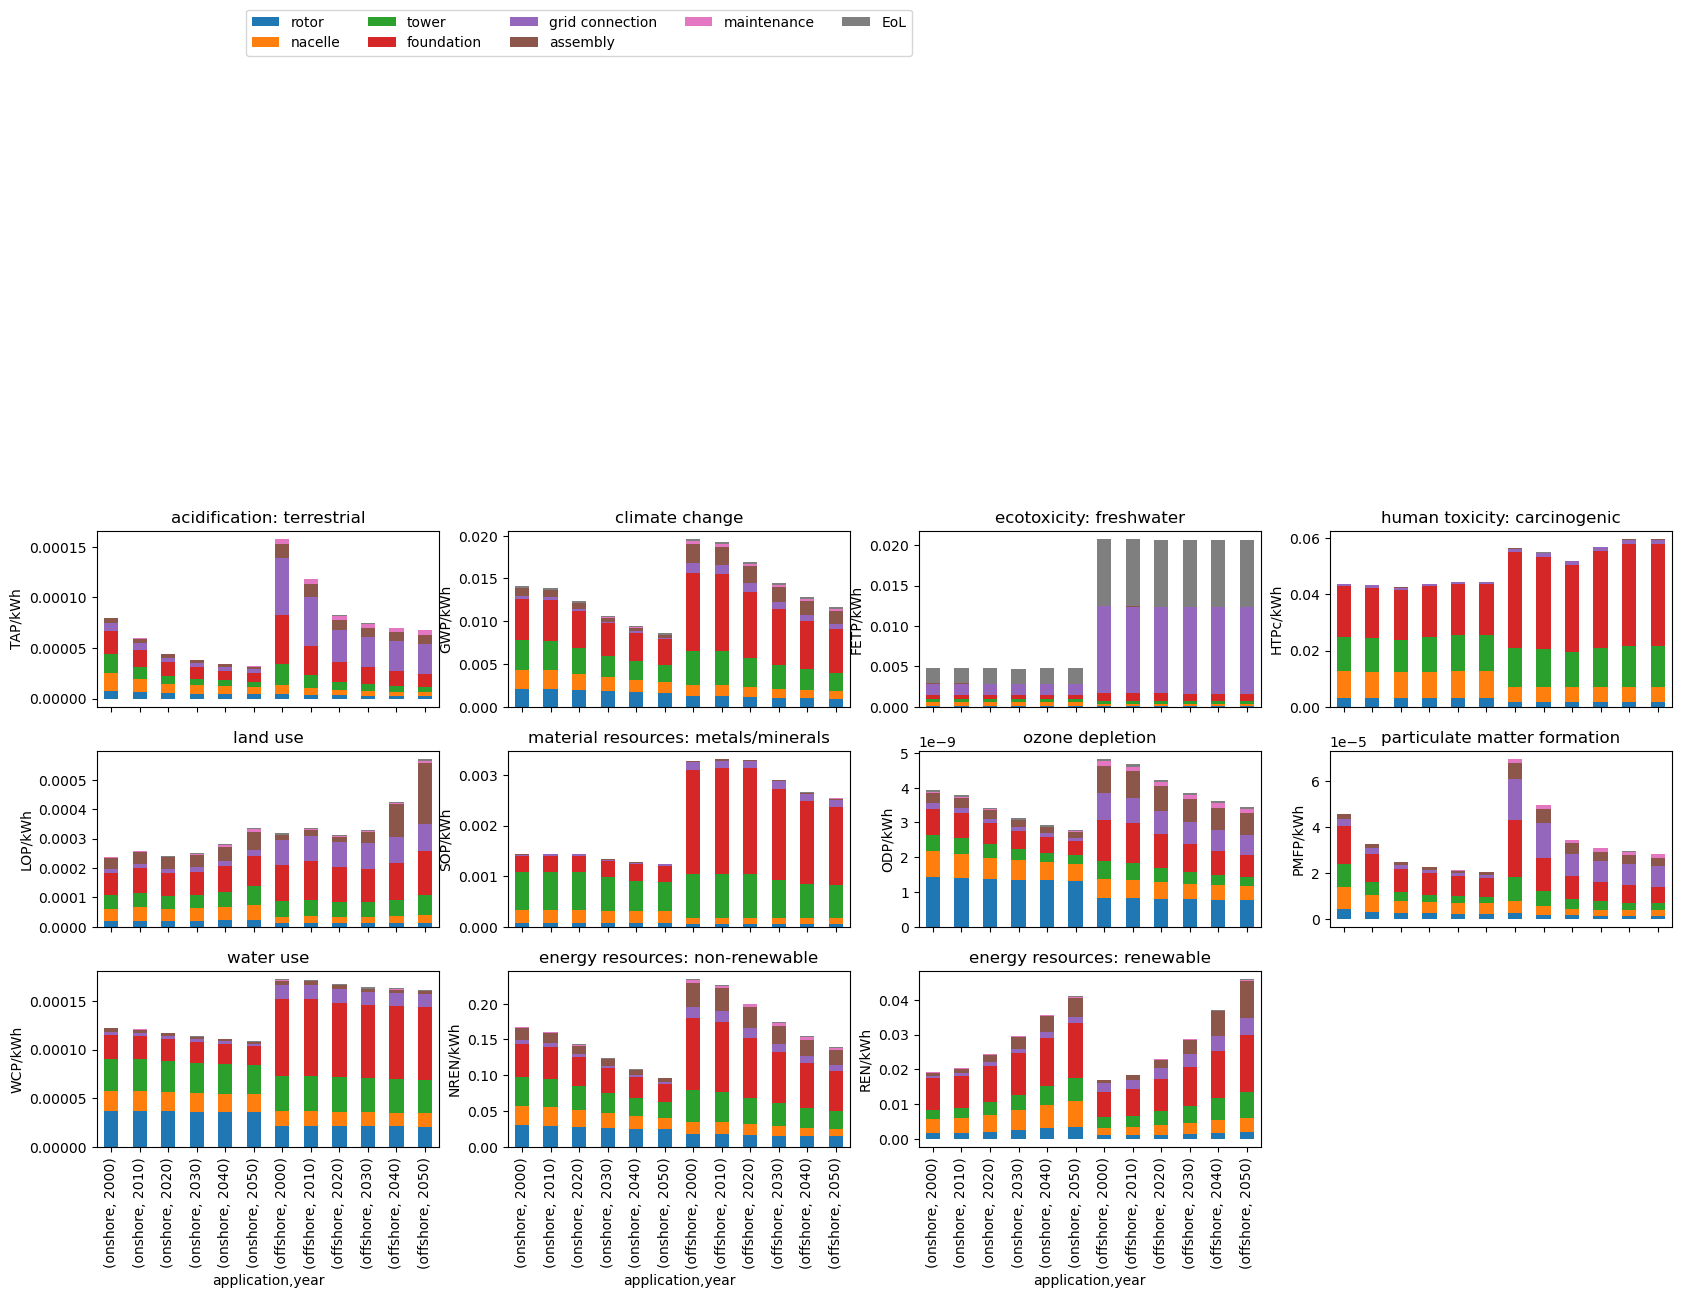

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(
    figsize=(15, 8),
    sharex=True,
    nrows=3, ncols=4,
    gridspec_kw=dict(hspace=0.25)
)

impacts = [
    'acidification: terrestrial',
    'climate change',
    'ecotoxicity: freshwater',
    'human toxicity: carcinogenic',
    'land use',
    'material resources: metals/minerals',
    'ozone depletion',
    'particulate matter formation',
    'water use',
    'energy resources: non-renewable',
    'energy resources: renewable',
]


targets = zip([x for x in impacts], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            size=1000,
            value=0).to_dataframe("val").unstack()["val"]

    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/kWh")
    ax.legend().remove()

# remove last plot
fig.delaxes(axs.flatten()[-1])

plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))
plt.tight_layout()

#make sure y axis label have enough space
plt.subplots_adjust(left=-0.15, )
plt.show()
